# NAVGEM Data

This demonstrates how to use data from the NAVGEM model from NOMADS.

> Note: there are not .idx files provided, so you have to download the full file and generate the .idx file with wgrib2 (requires Linux).

In [10]:
from herbie import Herbie
from toolbox import EasyMap, pc
from paint.standard2 import cm_tmp

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [11]:
H = Herbie("2022-12-10", model="navgem")

✅ Found ┊ model=navgem ┊ product=none ┊ 2022-Dec-10 00:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ None


In [12]:
H.PRODUCTS

{'none': ''}

In [13]:
H.SOURCES

{'nomads': 'https://nomads.ncep.noaa.gov/pub/data/nccf/com/fnmoc/prod/navgem.20221210/navgem_2022121000f000.grib2'}

In [20]:
# no index file available. Have to download the full file.
H.download()

TypeError: expected string or bytes-like object

In [15]:
import xarray

In [16]:
# Since we have the full file, we need to filter by keys to open the
# variable we want with cfgrib
x = xarray.open_dataset(
    H.get_localFilePath(),
    engine="cfgrib",
    backend_kwargs={
        "filter_by_keys": {"shortName": "2t", "typeOfLevel": "heightAboveGround"}
    },
)

c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "t2m".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


AttributeError: 'common_features' object has no attribute 'pcolormesh'

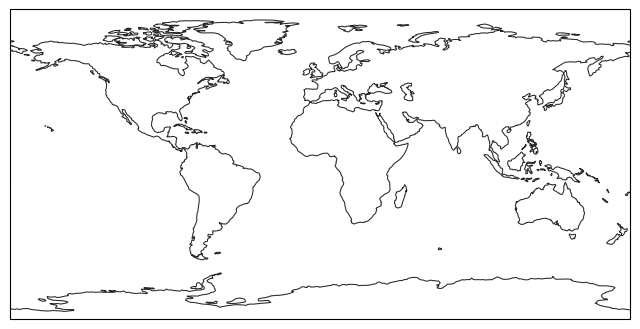

In [17]:
ax = EasyMap(crs=x.herbie.crs, figsize=[10, 8]).ax
p = ax.pcolormesh(
    x.longitude, x.latitude, x.t2m, transform=pc, **cm_tmp(units="K").cmap_kwargs
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **cm_tmp(units="K").cbar_kwargs
)

ax.set_title(x.t2m.GRIB_name, loc="right")
ax.set_title(f"{H.model.upper()}: {H.product_description}", loc="left")